# Домашнее задание

# 1 - Уменьшение палитры изображения (суммарно 6 баллов)
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a> нужно уменьшить число цветов в палитре.

Для этого нужно выделить **кластеры в пространстве RGB**, объекты соответствуют пикселям изображения. После выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.

Попробуйте различные алгоритмы кластеризации:

* KMeans
* DBSCAN
* AgglomerativeClustering

Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр).

Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики 
<a href='http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim'> SSIM </a>. Какой способ оказался лучшим?

Задание оценивает в 5 баллов.

Еще 1 балл даётся за запуск алгоритма на выбранных вами картинках - на них результат должен получиться красивым.

Вот вам вспомогательные функции для считывания и вывода изображений:

In [ ]:
import matplotlib.pyplot as plt
import cv2 # нужно поставить себе cv2 через conda install opencv
from statistics import mean
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

In [ ]:
img = cv2.imread('/content/загружено.png')
img.shape

(282, 404, 3)

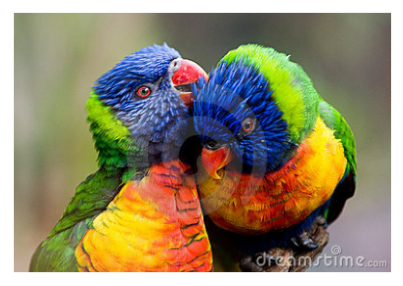

In [ ]:
img = cv2.imread('/content/загружено.png') # считать картинку
draw_picture(img) # нарисовать картинку

In [ ]:
def KMeans_clast(img,n):
  img1 = img.reshape(img.shape[0]*img.shape[1], 3)
  model = KMeans(n_clusters=n)
  y_pred = model.fit_predict(img1)
  print(silhouette_score(img1,y_pred))
  r,g,b =[],[],[]
  for i in range(n):
    if len(img1[y_pred==i])!=0:
      r.append(round(sum(list(map(lambda x: x[0], img1[y_pred==i])))/len(img1[y_pred==i])))
      g.append(round(sum(list(map(lambda x: x[1], img1[y_pred==i])))/len(img1[y_pred==i])))
      b.append(round(sum(list(map(lambda x: x[2], img1[y_pred==i])))/len(img1[y_pred==i])))
      img1[y_pred==i] = list((r[i],g[i],b[i]))
  img1 = img1.reshape(img.shape[0], img.shape[1], 3)

  draw_picture(img1)



def DBSCAN_clast(img,n,e):
  img1 = img.reshape(img.shape[0]*img.shape[1], 3)
  model = DBSCAN(eps=e, min_samples=n)
  y_pred = model.fit_predict(img1)
  print(silhouette_score(img1,y_pred))
  r,g,b =[],[],[]
  for i in range(n):
    if len(img1[y_pred==i])!=0:
      r.append(round(sum(list(map(lambda x: x[0], img1[y_pred==i])))/len(img1[y_pred==i])))
      g.append(round(sum(list(map(lambda x: x[1], img1[y_pred==i])))/len(img1[y_pred==i])))
      b.append(round(sum(list(map(lambda x: x[2], img1[y_pred==i])))/len(img1[y_pred==i])))
      img1[y_pred==i] = list((r[i],g[i],b[i]))
  img1 = img1.reshape(img.shape[0], img.shape[1], 3)

  draw_picture(img1)




def Agglomerative_clast(img,n):
  img1 = img.reshape(img.shape[0]*img.shape[1], 3)
  model = AgglomerativeClustering(n_clusters=n, linkage='single')
  y_pred = model.fit_predict(img1)
  print(silhouette_score(img1,y_pred))
  r,g,b =[],[],[]
  for i in range(n):
    if len(img1[y_pred==i])!=0:
      r.append(round(sum(list(map(lambda x: x[0], img1[y_pred==i])))/len(img1[y_pred==i])))
      g.append(round(sum(list(map(lambda x: x[1], img1[y_pred==i])))/len(img1[y_pred==i])))
      b.append(round(sum(list(map(lambda x: x[2], img1[y_pred==i])))/len(img1[y_pred==i])))
      img1[y_pred==i] = list((r[i],g[i],b[i]))
  img1 = img1.reshape(img.shape[0], img.shape[1], 3)

  draw_picture(img1)

0.6745414733231321


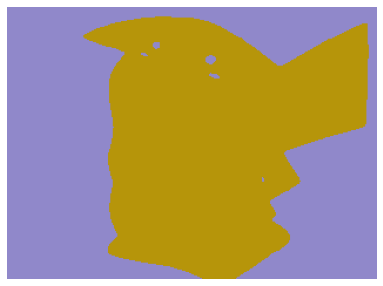

0.7349795648921497


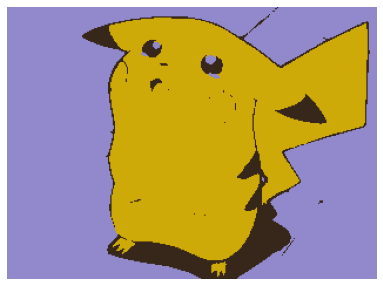

0.642244730340512


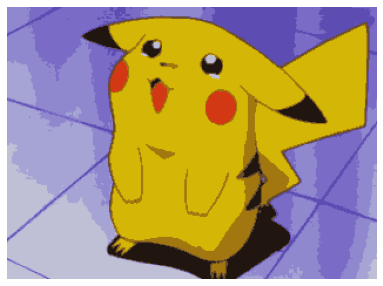

0.5644175219877836


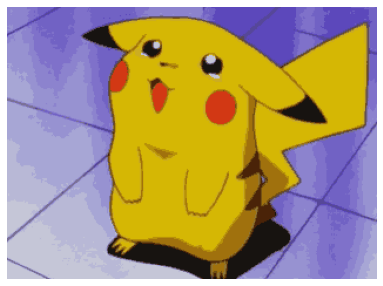

-0.515303983727889


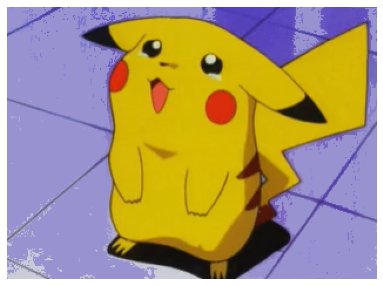

-0.5173835584972089


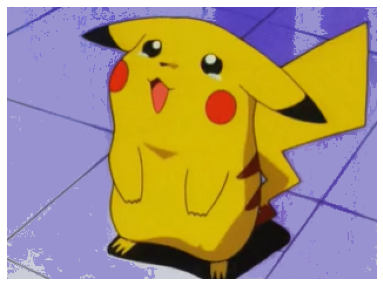

-0.4048293659895404


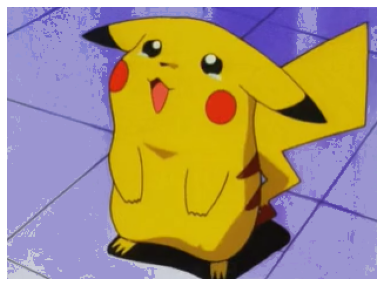

-0.24341641024215896


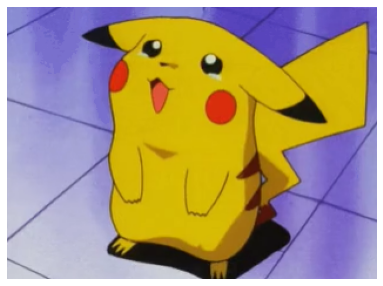

-0.17129234899293563


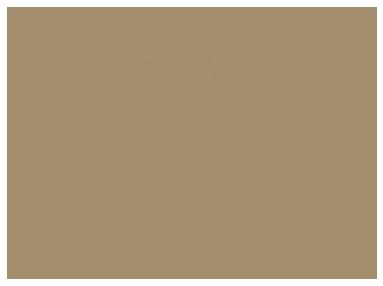

-0.23128518686271565


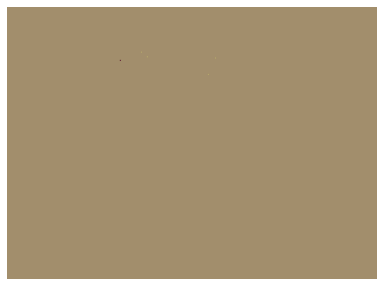

-0.3079485636338783


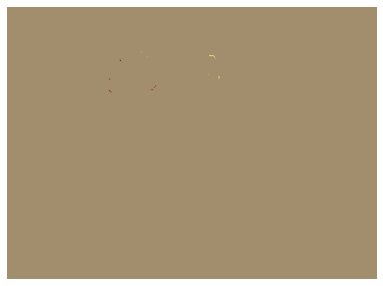

-0.40026377503964855


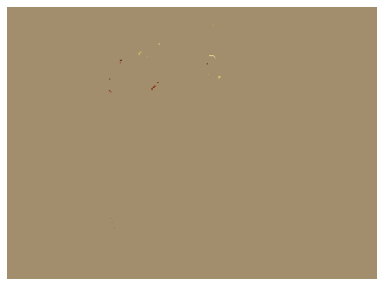

In [ ]:
for i in [2,3,10,20]:
  img = cv2.imread('/content/Screenshot_1.png')
  KMeans_clast(img,i)
for i in [2,3,10,20]:
  img = cv2.imread('/content/Screenshot_1.png')
  DBSCAN_clast(img,i,1)
for i in [2,3,10,20]:
  img = cv2.imread('/content/Screenshot_1.png')
  Agglomerative_clast(img,i)

0.3661412555805946


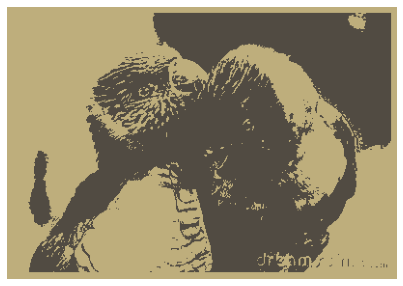

0.4105390696549339


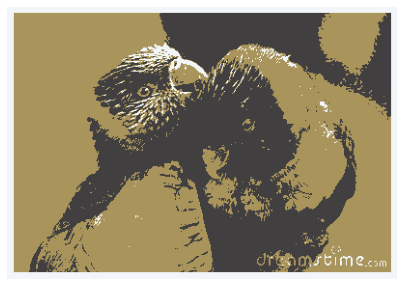

0.4273751660570278


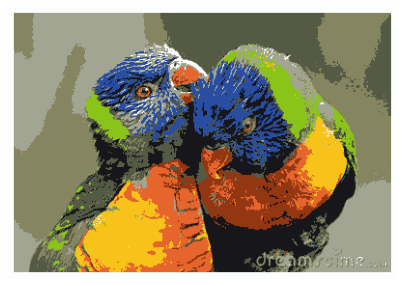

0.4223679293776579


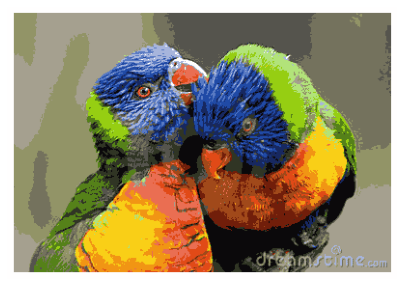

-0.47426217462103193


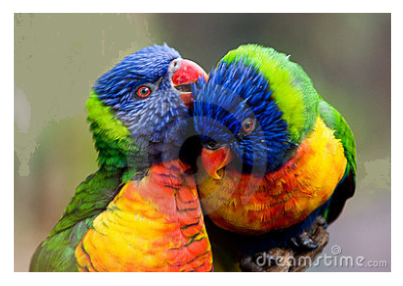

-0.5549308221021277


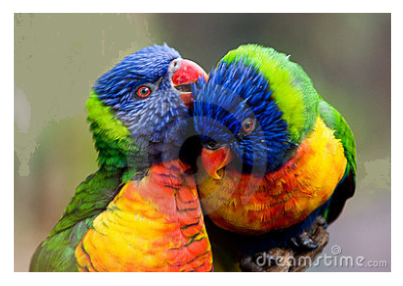

-0.4536675445372098


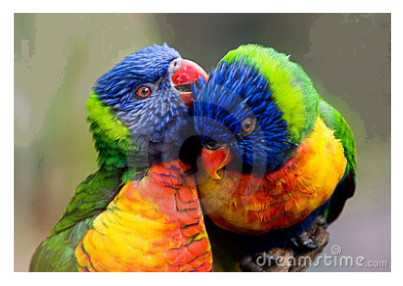

-0.43643428027691755


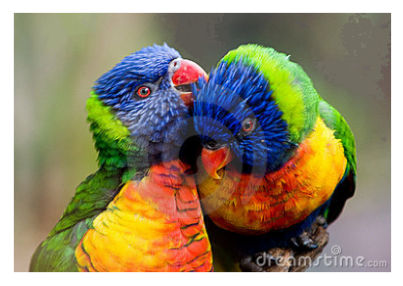

0.05575986604193872


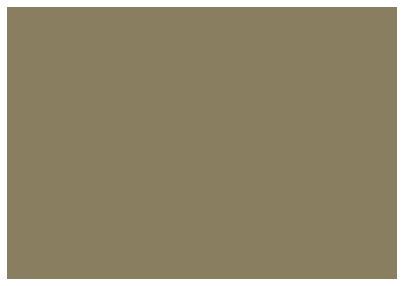

-0.10760377557639077


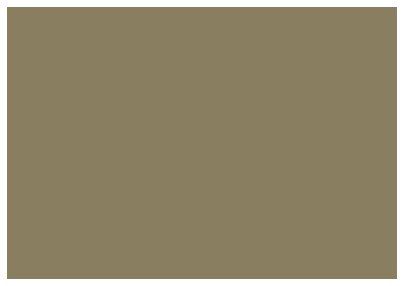

-0.3082147972773832


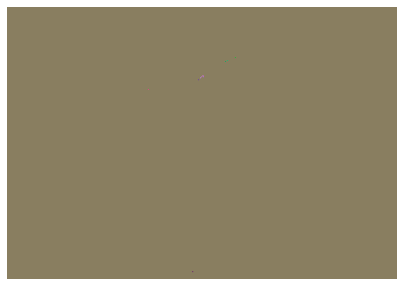

-0.38125553152498154


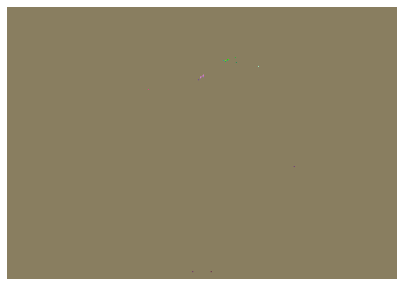

In [ ]:
for i in [2,3,10,20]:
  img = cv2.imread('/content/загружено.png')
  KMeans_clast(img,i)
for i in [2,3,10,20]:
  img = cv2.imread('/content/загружено.png')
  DBSCAN_clast(img,i,1)
for i in [2,3,10,20]:
  img = cv2.imread('/content/загружено.png')
  Agglomerative_clast(img,i)

Выше сделал все что требовалось в задании, в качестве доп картинки взял пикачу, наиболее качественым был алгоритм KMeans_clast, для Agglomerative слишком малое значение n из предложенных, я пробовал больше 100 1000, рисовалась адекватная картинка


-0.691553031773155


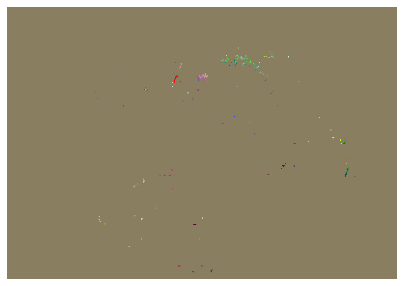

In [ ]:
img = cv2.imread('/content/загружено.png')
Agglomerative_clast(img,200)

# 2 - Уменьшение размерности помогает классификации лиц (суммарно 6 баллов)

Используя методы уменьшения размерности признаков, решите с максимальным **accuracy** задачу классификации лиц знаменитостей (датасет старый, неудивительно, если вы из всех знаменитостей будете знать только Буша и Шварценнегера).

Попробуйте добиться максимального accuracy (2 балла)
* без уменьшения размерности
* с уменьшением размерности

Возможно без уменьшения размерности у вас даже просто не получится дождаться времени работы на 11750 признаках. Я слышал у кого-то получилось, у меня нет.

Сравните ваш результат с константным предсказанием "всегда самый популярный класс". Делает ли ваша модель какой-то значительный прогресс? (1 балл)

Нарисуйте несколько лиц, на которых ваш алгоритм ошибся, подпишите правильный ответ и ваш ответ. (1 балл)

Напишите, каким алгоритмом вы воспользовались (PCA или TSNE), почему не другим? Обоснуйте ответ. (1 балл)

Визуализируйте датасет на плоскости. Подпишите несколько самых больших классов именами людей. Чем вы воспользуетесь, PCA или TSNE? Обоснуйте ответ (1 балл)

Скачивание данных и вспомогательная функция визуализации лиц уже есть:

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0)
# эту строчку менять нельзя, ресайзить нельзя

In [ ]:
from sklearn.model_selection import train_test_split
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)
# эту строчку тоже менять нельзя'

In [ ]:
y_naive = [8]*2370 # наибольшее число фото одного человека под номером '8'

In [ ]:
names[8] # в y лежат номера, а names переводит номер в имя

'George W Bush'

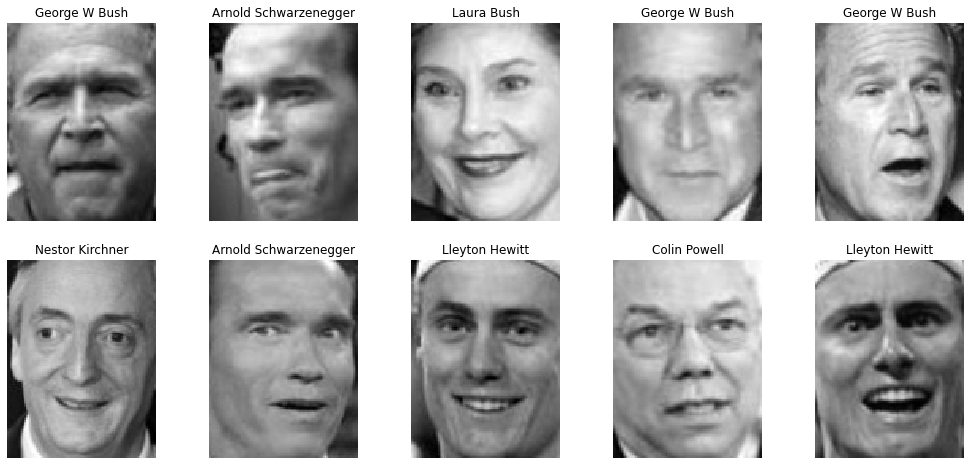

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title(names[y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(range(10), nrows=2, ncols=5)# первые 10 лиц

In [ ]:
X.shape

(2370, 11750)

In [ ]:
t,s = np.unique(y, return_counts=True)
print(t,s)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33] [ 39  35  36  77  42 236  31 121 530 109  44  30  39  71  52  55  42  53
  31  60  32  41  41  48  33  37  30  32  52  33  33 144  32  49]


In [ ]:
names[t[list(map(lambda x: x in np.sort(s)[-5:],s))]] #самые популярные лица

array(['Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Tony Blair'], dtype='<U25')

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


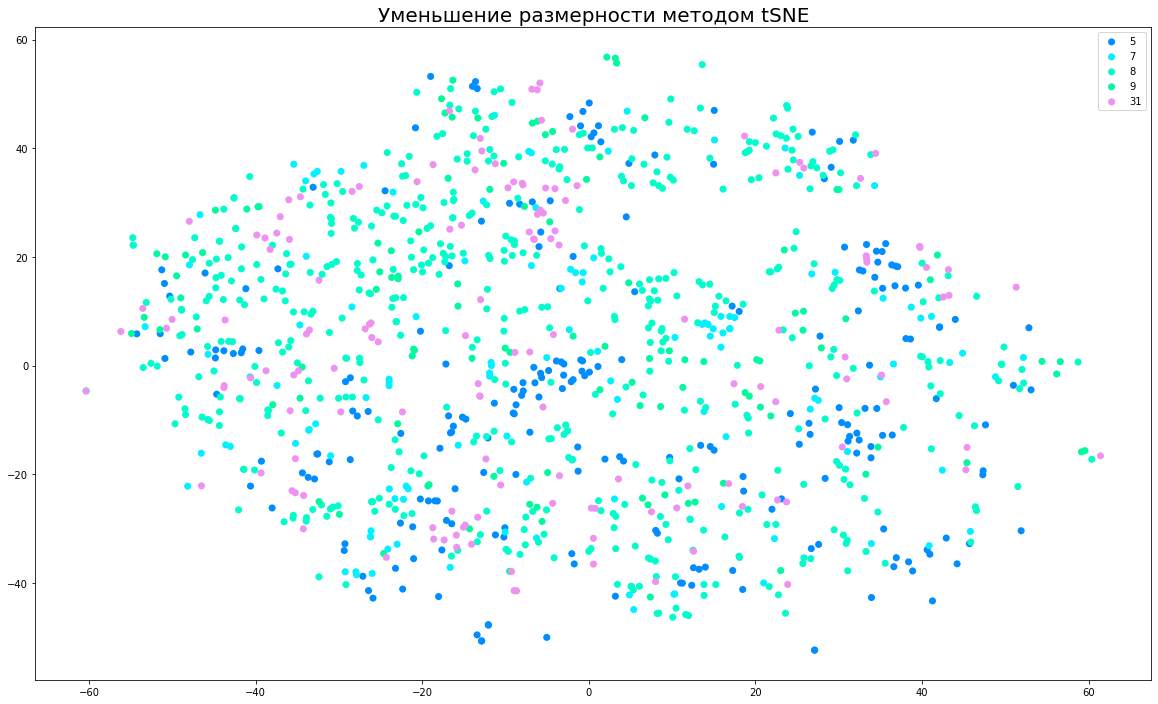

In [ ]:
from sklearn.manifold import TSNE
from matplotlib.colors import Normalize

tsne = TSNE(n_components=2, n_iter=4000)
X_tsne_2 = tsne.fit_transform(X)
plt.figure(figsize=(20, 12))
for d in t[list(map(lambda x: x in np.sort(s)[-5:],s))]:
    norm = Normalize(vmin=0, vmax=34)
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_tsne_2[:, 0][y == d],
                X_tsne_2[:, 1][y == d],
                c=[color] * len(X_tsne_2[:, 0][y == d]), label=d, edgecolor='none', s=50)
plt.title(u"Уменьшение размерности методом tSNE", fontsize=20)
plt.legend()
print(names[t[list(map(lambda x: x in np.sort(s)[-5:],s))]])

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


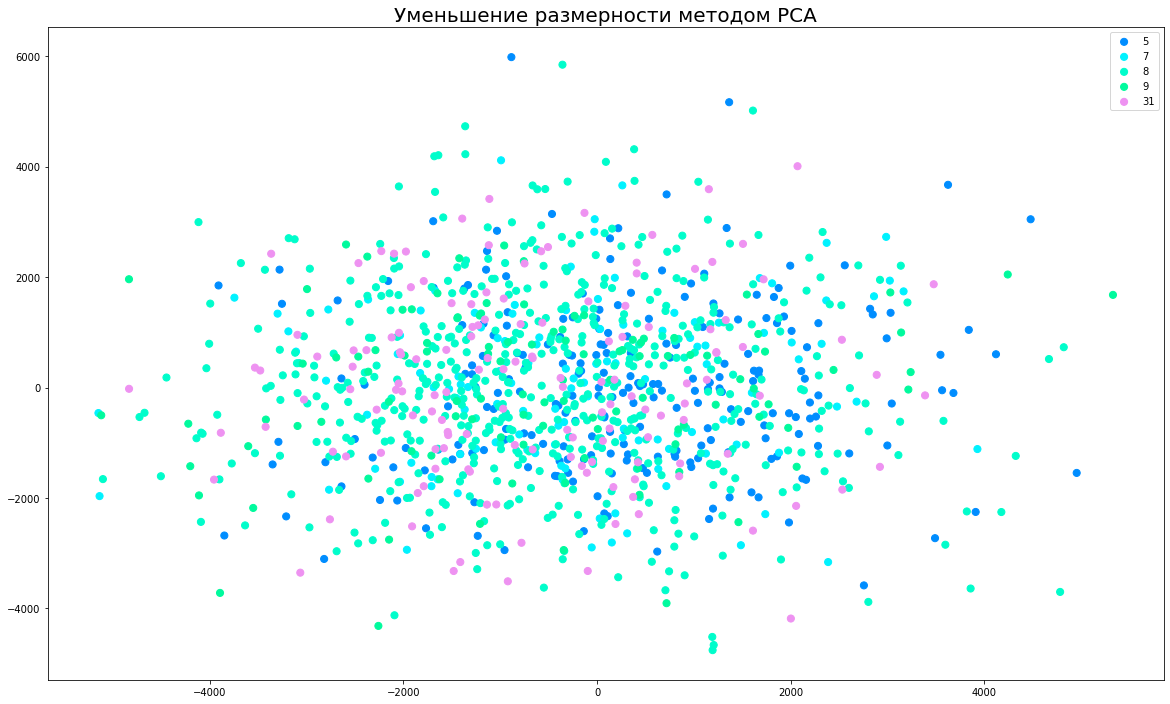

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# Применим PCA к нашим векторам с цифрами
X_pca_2 = pca.fit(X).transform(X)

plt.figure(figsize=(20, 12))
for d in t[list(map(lambda x: x in np.sort(s)[-5:],s))]:
    norm = Normalize(vmin=0, vmax=34) # для красивых цветов
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_pca_2[:, 0][y == d],
                X_pca_2[:, 1][y == d],
                c=[color] * len(X_pca_2[:, 0][y == d]), label=d, edgecolor='face', s=50)
plt.title(u"Уменьшение размерности методом PCA", fontsize=20)
plt.legend()
print(names[t[list(map(lambda x: x in np.sort(s)[-5:],s))]])

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression

# будем применять, например, логистическую регрессию
print('accuracy for raw data is {}'.format(cross_val_score(LogisticRegression(),
                                                           X, y,
                                                           scoring='accuracy').mean()))
print('accuracy for data transormed by tSNE {}'.format(cross_val_score(LogisticRegression(),
                                                                             X_tsne_2, y,
                                                                             scoring='accuracy').mean()))
print('accuracy for data transormed by PCA {}'.format(cross_val_score(LogisticRegression(),
                                                                            X_pca_2, y,
                                                                            scoring='accuracy').mean()))
print('accuracy for data untransormed (naive) {}'.format(accuracy_score(y, y_naive)))



accuracy for raw data is 0.6780590717299578
accuracy for data transormed by tSNE 0.23333333333333334
accuracy for data transormed by PCA 0.23037974683544302
accuracy for data untransormed (naive) 0.22362869198312235


In [ ]:
pca = PCA(n_components=1000)
# Применим PCA к нашим векторам с цифрами
X_pca_1000 = pca.fit(X).transform(X)
print('accuracy for data transormed by PCA {}'.format(cross_val_score(LogisticRegression(),
                                                                            X_pca_1000, y,
                                                                            scoring='accuracy').mean()))
                                                                      

accuracy for data transormed by PCA 0.6978902953586498


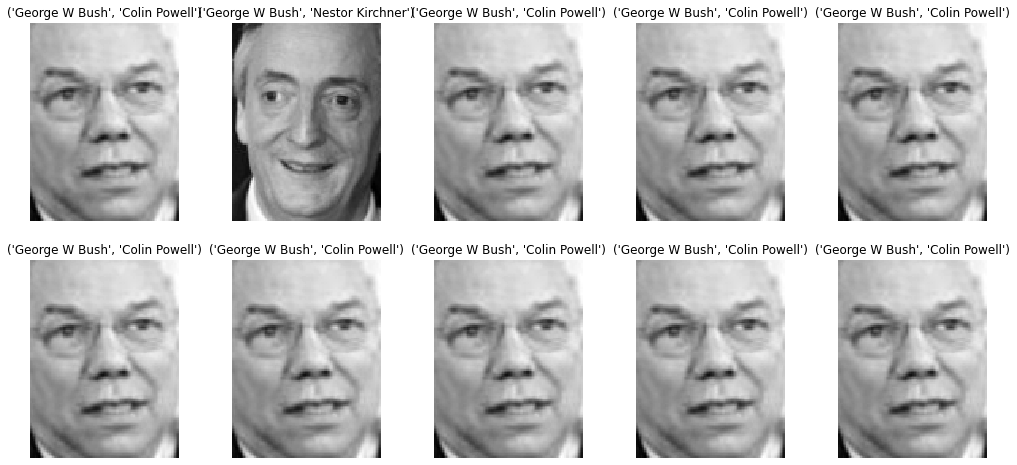

In [ ]:
def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title((names[y_pred[image_id]],names[y[image_id]]))
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(y_pred[errors][:10], nrows=2, ncols=5)

Добивался accuracy уменшением размерности и без уменьшения, без уменьшения 0.67 (можно лучше если попробовать использовать другой алгоритм) 


Если гооврить об уменьшении размерности то есть 2 пути:
tSNE не смог мне както помочь, 0.23, немного выше наивного(0.22) на мой взгляд это произошло в связи с рем, что 11к > признаков сжималось до двумерной точки что не очень хорошо для предсказания

PCA также если сжимать до двухмерного состояния, но намного лучше если, например, до 1000, при этом результат намного лучше чем у tSNE наивного и немного лучше чем у регресии без уменьшения размерности (0.7)

Другой алгоритм из предсталвенных не использовал, так как он не эффективен, предпочтения отдаю PCA

Лица где алгоритм ошибся нарисовал, если приглядется на граффики, то также видно что кластеризация происходила на отдельных участках но недостаточна(на них представлены топ 5 частых персоналий)